In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# %matplotlib inline will lead to static images of your plot embedded in the notebook

In [4]:
df_train=pd.read_csv('C:\\Users\\Vijay_Supe\\Desktop\\train_data.csv')

In [5]:
df_train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [6]:
df_train.isnull().sum()
# checking for null values

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [7]:
df_train.info()
# checking for datatypes and other details

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

<Axes: xlabel='Region_Code', ylabel='Density'>

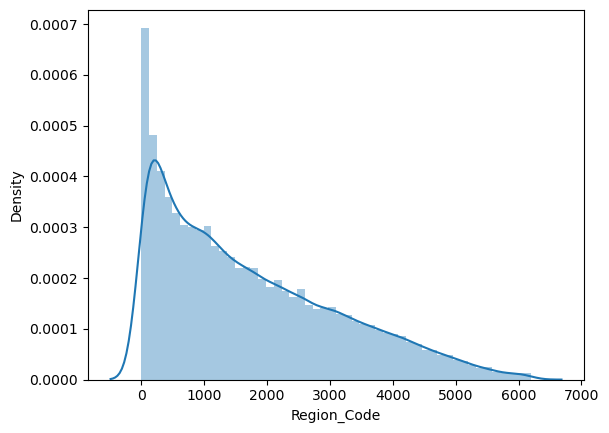

In [8]:
sns.distplot(df_train['Region_Code'])
# plot for visualisation (distribution plot)

<Axes: xlabel='Holding_Policy_Type', ylabel='Density'>

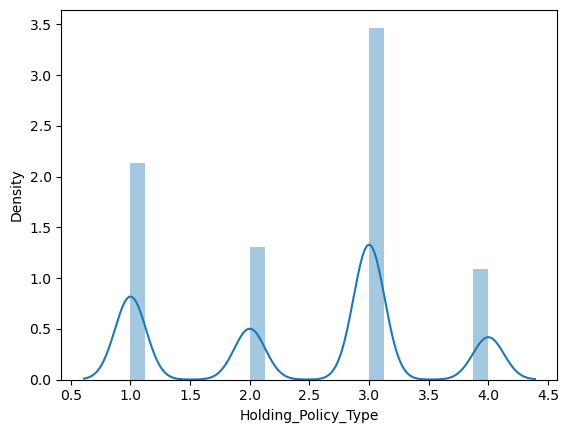

In [9]:
sns.distplot(df_train['Holding_Policy_Type'])
# plot for visualisation (distribution plot)

<Axes: xlabel='Reco_Policy_Premium', ylabel='Density'>

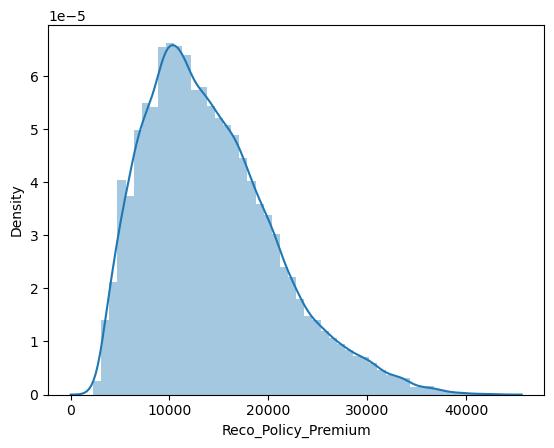

In [10]:
sns.distplot(df_train['Reco_Policy_Premium'])
# plot for visualisation (distribution plot)

In [11]:
df_train['Reco_Policy_Premium'].describe()
# this feature describes the premium for policy

count    50882.000000
mean     14183.950069
std       6590.074873
min       2280.000000
25%       9248.000000
50%      13178.000000
75%      18096.000000
max      43350.400000
Name: Reco_Policy_Premium, dtype: float64

<Axes: ylabel='Accomodation_Type'>

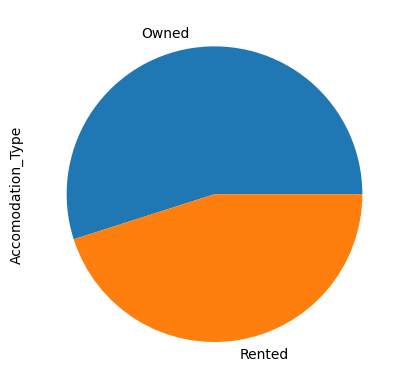

In [12]:
df_train['Accomodation_Type'].value_counts().plot(kind = 'pie')
#visualisation of features

In [13]:
df_train.Accomodation_Type.value_counts()
# this is object datatype

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

In [14]:
df_train['Accomodation_Type']=df_train['Accomodation_Type'].map({'Rented':0,
                             'Owned':1
    
})
df_train.Accomodation_Type.value_counts()

# maping features in order to make all int values

1    27951
0    22931
Name: Accomodation_Type, dtype: int64

<Axes: ylabel='Reco_Insurance_Type'>

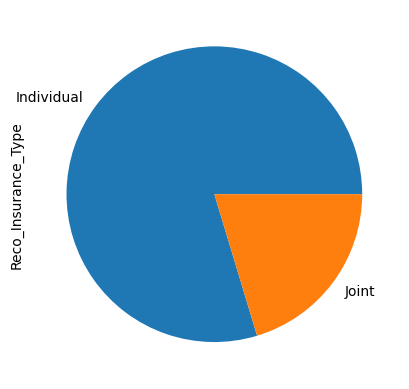

In [15]:
df_train['Reco_Insurance_Type'].value_counts().plot(kind = 'pie')

In [16]:
df_train['Reco_Insurance_Type']=df_train['Reco_Insurance_Type'].map({'Individual':0,
                             'Joint':1
    
})
df_train.Reco_Insurance_Type.value_counts()

# maping features in order to make all int values

0    40536
1    10346
Name: Reco_Insurance_Type, dtype: int64

<Axes: ylabel='Is_Spouse'>

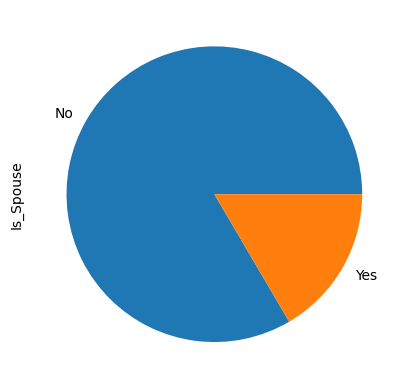

In [17]:
df_train['Is_Spouse'].value_counts().plot(kind = 'pie')

In [18]:
df_train['Is_Spouse']=df_train['Is_Spouse'].map({'No':0,
                             'Yes':1
    
})
df_train.Reco_Insurance_Type.value_counts()

0    40536
1    10346
Name: Reco_Insurance_Type, dtype: int64

<Axes: >

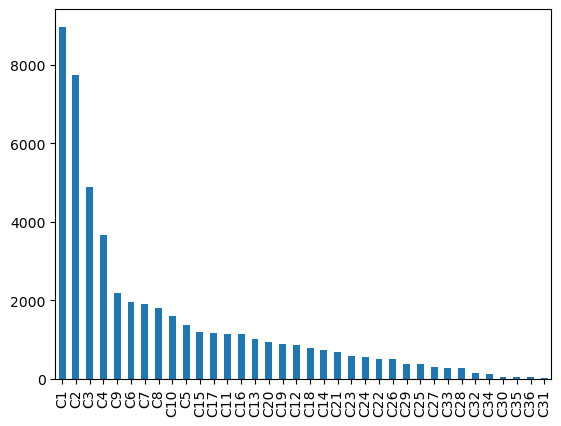

In [19]:
df_train['City_Code'].value_counts().plot(kind = 'bar')

In [20]:
df_train['City_Code'].unique()


array(['C3', 'C5', 'C24', 'C8', 'C9', 'C1', 'C15', 'C28', 'C27', 'C7',
       'C20', 'C25', 'C4', 'C2', 'C34', 'C10', 'C17', 'C18', 'C16', 'C29',
       'C33', 'C26', 'C19', 'C6', 'C12', 'C13', 'C11', 'C14', 'C22',
       'C23', 'C21', 'C36', 'C32', 'C30', 'C35', 'C31'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_train['City_Code']=LabelEncoder().fit_transform(df_train['City_Code'])

In [22]:
df_train.sample(n=5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
8634,8635,8,2500,0,0,25,25,0,X4,NaN,NaN,22,6710.0,1
16244,16245,11,2227,0,0,42,42,0,X2,NaN,NaN,11,12826.0,0
44555,44556,33,274,0,0,62,62,0,NaN,14+,2.0,13,18624.0,0
29003,29004,0,1389,1,0,72,72,0,X5,2.0,1.0,12,14716.0,1
11195,11196,0,156,1,1,59,56,0,X5,NaN,NaN,5,23755.2,0


In [23]:
df_train['Holding_Policy_Duration'].unique()
# here we found that 14+ value needs to be changed

array(['14+', nan, '1.0', '3.0', '5.0', '9.0', '14.0', '7.0', '2.0',
       '11.0', '10.0', '8.0', '6.0', '4.0', '13.0', '12.0'], dtype=object)

In [24]:
df_train['Holding_Policy_Duration']=df_train['Holding_Policy_Duration'].replace('14+',15.0)
# value replaced
df_train['Holding_Policy_Duration'].replace(np.nan,df_train['Holding_Policy_Duration'].mode()[0],inplace=True)
# treatment of null values
df_train['Holding_Policy_Duration']=df_train['Holding_Policy_Duration'].astype(float)
# changing datatype str to float

In [25]:
df_train['Holding_Policy_Duration'].unique()
# checking unique value

array([15.,  1.,  3.,  5.,  9., 14.,  7.,  2., 11., 10.,  8.,  6.,  4.,
       13., 12.])

In [26]:
df_train['Health Indicator'].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [27]:
df_train['Health Indicator'].replace(np.nan,df_train['Health Indicator'].mode()[0],inplace=True)
df_train['Health Indicator'].value_counts()
# treatment of null values and crosschecking it

X1    24701
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_train['Health Indicator']=LabelEncoder().fit_transform(df_train['Health Indicator'])
df_train['Health Indicator'].value_counts()

# LabelEncoder can be used to normalize labels.  

0    24701
1    10332
2     6762
3     5743
4     1727
5     1280
6      196
7       78
8       63
Name: Health Indicator, dtype: int64

In [29]:
df_train['Holding_Policy_Type'].replace(np.nan,df_train['Holding_Policy_Type'].mode()[0],inplace=True)
df_train['Holding_Policy_Type'].value_counts()


3.0    33530
1.0     8173
2.0     5005
4.0     4174
Name: Holding_Policy_Type, dtype: int64

In [30]:
df_train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  int32  
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  int64  
 4   Reco_Insurance_Type      50882 non-null  int64  
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  int64  
 8   Health Indicator         50882 non-null  int32  
 9   Holding_Policy_Duration  50882 non-null  float64
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(3), int32(2

ID


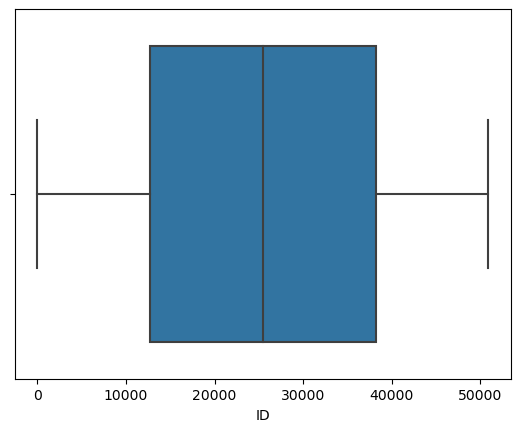

City_Code


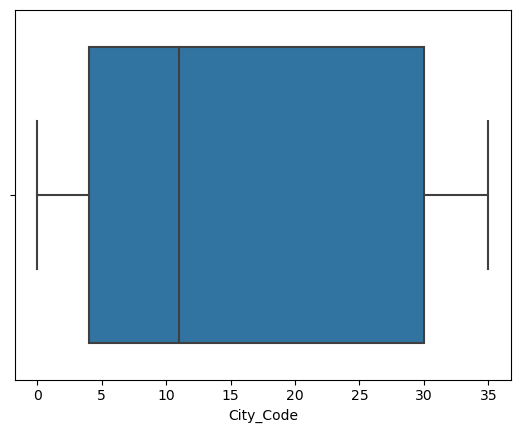

Region_Code


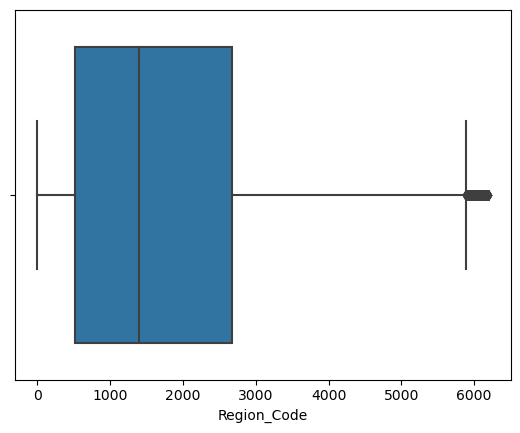

Accomodation_Type


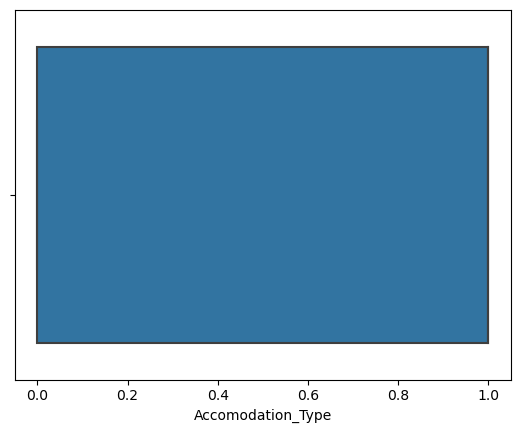

Reco_Insurance_Type


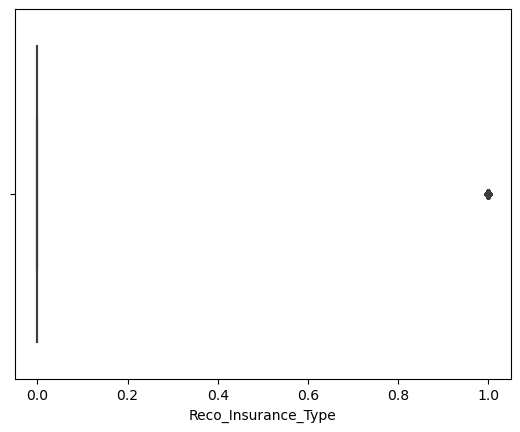

Upper_Age


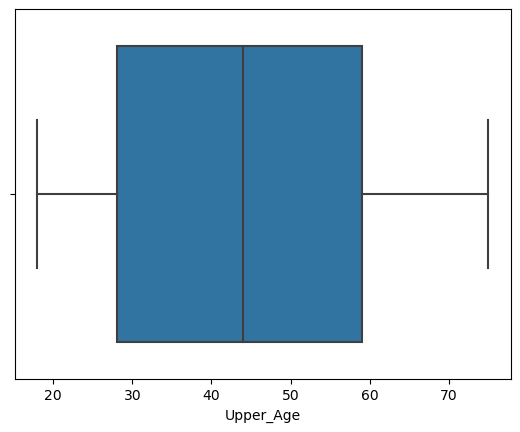

Lower_Age


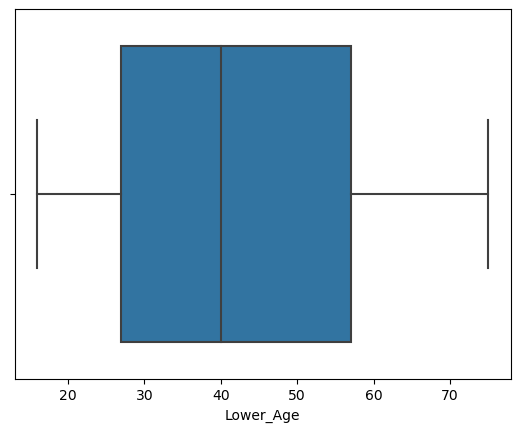

Is_Spouse


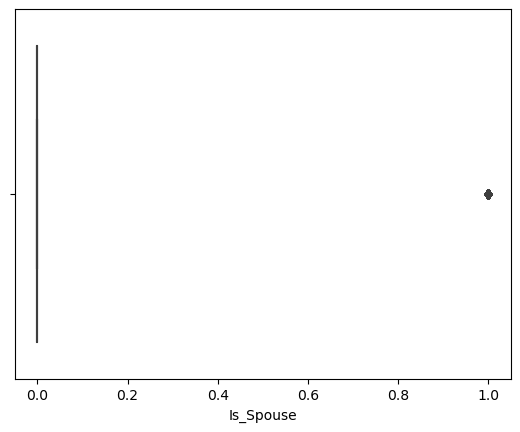

Health Indicator


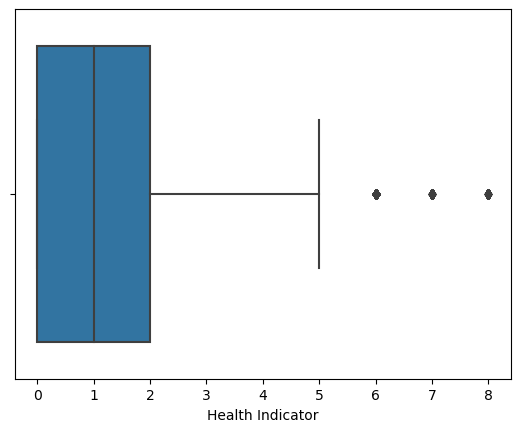

Holding_Policy_Duration


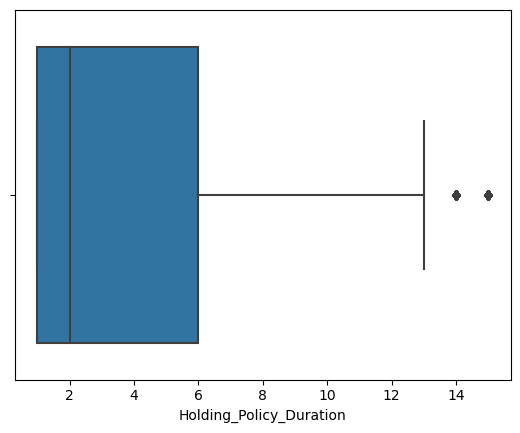

Holding_Policy_Type


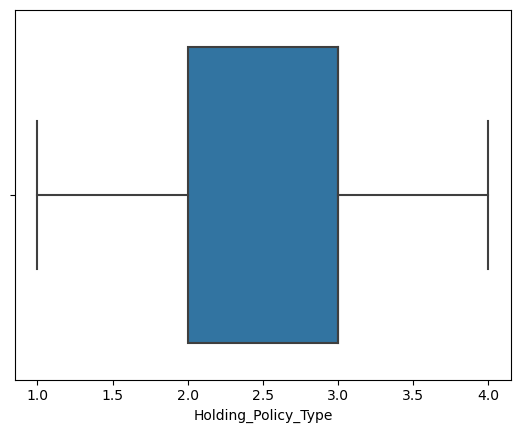

Reco_Policy_Cat


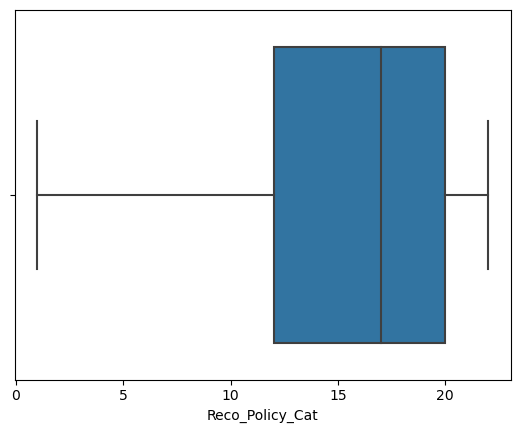

Reco_Policy_Premium


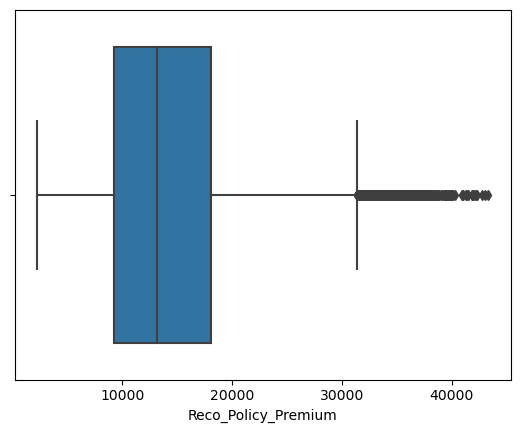

In [32]:
for col in df_train.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=df_train[col],data=df_train)
    plt.show()
    
# boxplot for checking of Outliers

In [34]:
def boxoutlier(var):
    for x in var.iloc[:,:-1].columns :        
        Q1=var[x].quantile(0.25)
        Q3=var[x].quantile(0.75)
        IQR=Q3-Q1
        Lower = Q1-(1.5*IQR)
        Upper = Q3+(1.5*IQR)
        var.loc[:,x]=np.where(var[x].values > Upper,Upper,var[x].values)
        var.loc[:,x]=np.where(var[x].values < Lower,Lower,var[x].values)
        
    return var
df1=boxoutlier(df_train)

ID


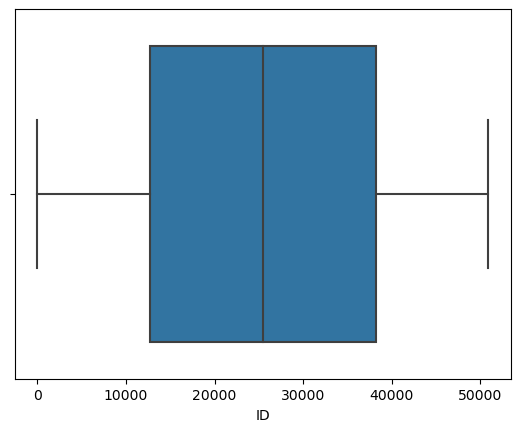

City_Code


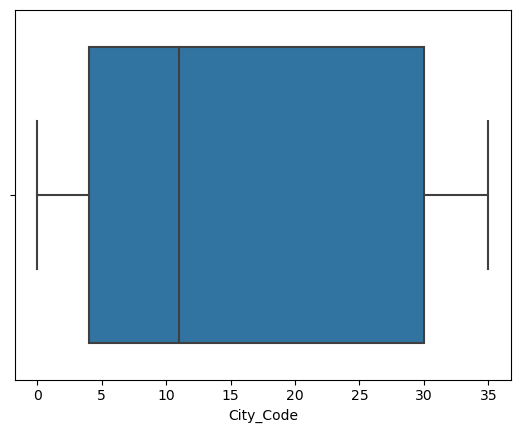

Region_Code


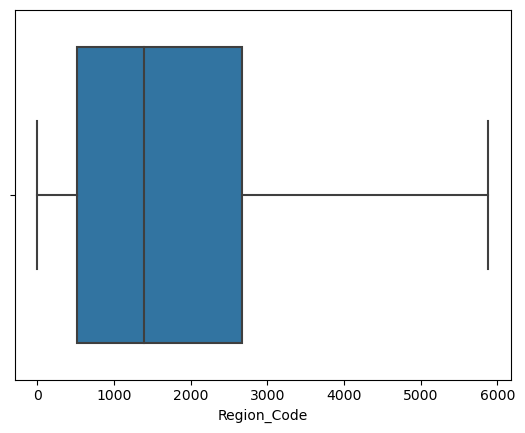

Accomodation_Type


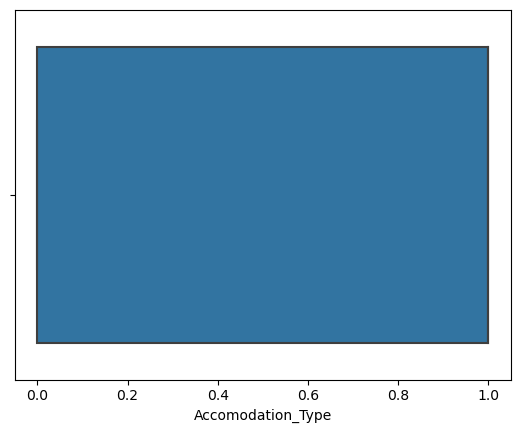

Reco_Insurance_Type


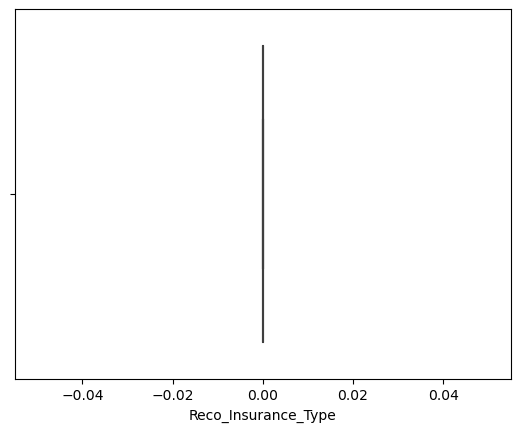

Upper_Age


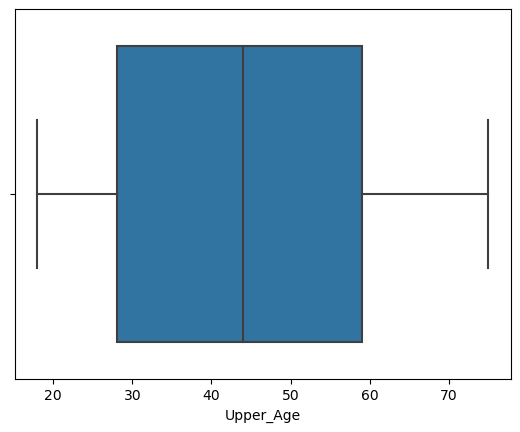

Lower_Age


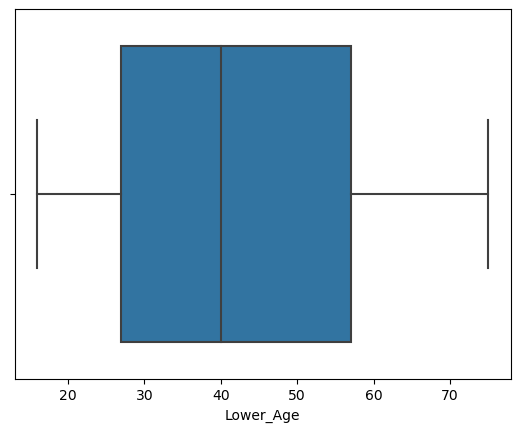

Is_Spouse


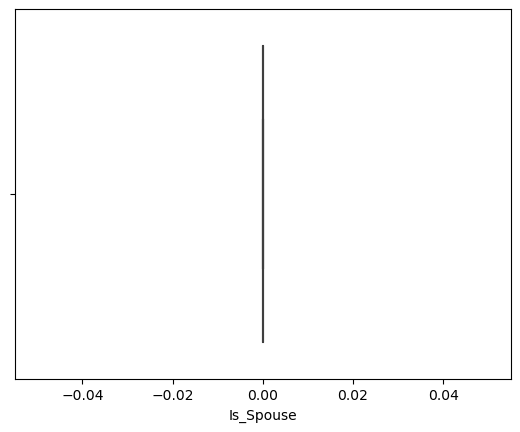

Health Indicator


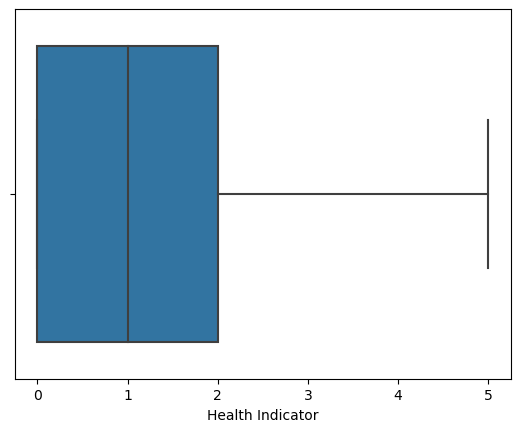

Holding_Policy_Duration


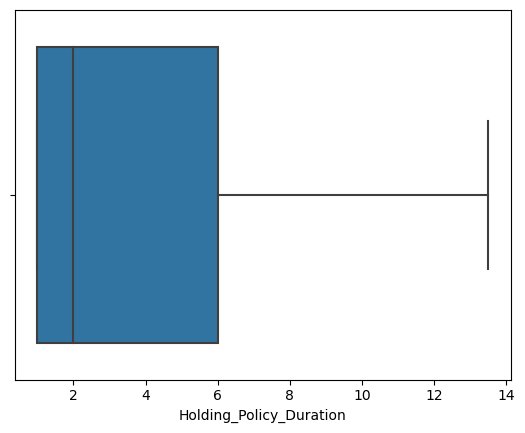

Holding_Policy_Type


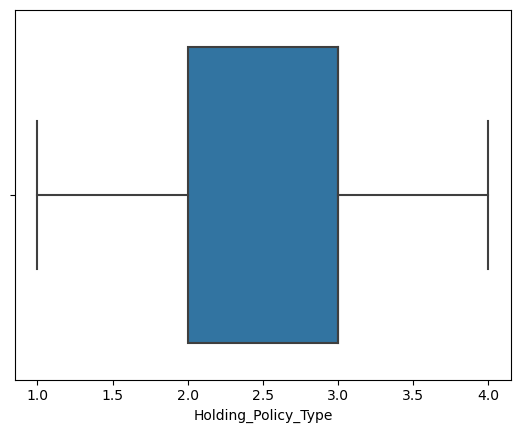

Reco_Policy_Cat


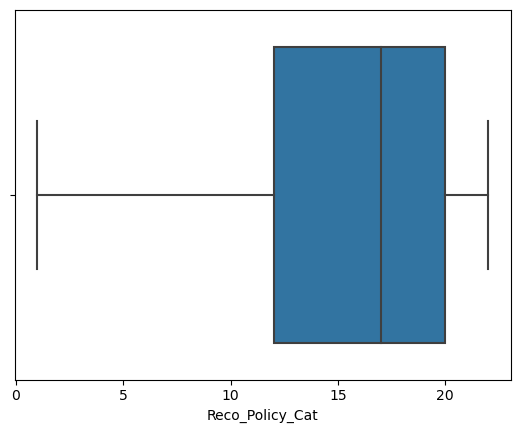

Reco_Policy_Premium


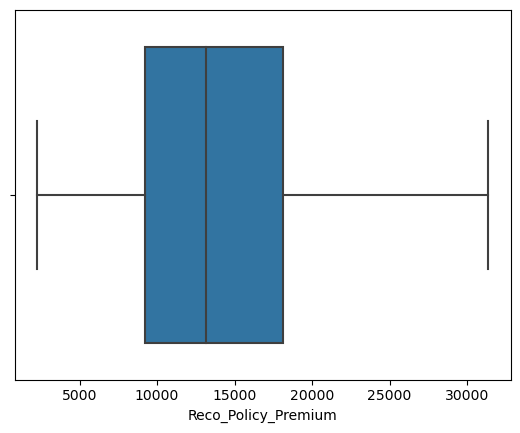

In [35]:
for col in df1.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=df1[col],data=df1)
    plt.show()

In [36]:
X=df1.drop('Response',axis=1)

In [37]:
y=df1['Response']

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  float64
 1   City_Code                50882 non-null  float64
 2   Region_Code              50882 non-null  float64
 3   Accomodation_Type        50882 non-null  float64
 4   Reco_Insurance_Type      50882 non-null  float64
 5   Upper_Age                50882 non-null  float64
 6   Lower_Age                50882 non-null  float64
 7   Is_Spouse                50882 non-null  float64
 8   Health Indicator         50882 non-null  float64
 9   Holding_Policy_Duration  50882 non-null  float64
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  float64
 12  Reco_Policy_Premium      50882 non-null  float64
dtypes: float64(13)
memory usage: 5.0 MB


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4 )

In [41]:
display(X_train.head(),y_train.head(),'Testing Data',X_test.head(),y_test.head())

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
39491,39492.0,22.0,4448.0,1.0,0.0,28.0,28.0,0.0,3.0,4.0,1.0,12.0,8176.0
34957,34958.0,34.0,730.0,1.0,0.0,19.0,19.0,0.0,0.0,1.0,3.0,12.0,5376.0
3122,3123.0,30.0,2419.0,0.0,0.0,28.0,28.0,0.0,0.0,5.0,1.0,9.0,11700.0
35347,35348.0,1.0,1410.0,0.0,0.0,24.0,24.0,0.0,0.0,4.0,1.0,18.0,6860.0
41897,41898.0,35.0,1910.0,1.0,0.0,47.0,43.0,0.0,1.0,1.0,3.0,4.0,22212.0


39491    0
34957    0
3122     0
35347    0
41897    0
Name: Response, dtype: int64

'Testing Data'

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
48025,48026.0,13.0,5322.0,1.0,0.0,48.0,48.0,0.0,3.0,7.0,3.0,8.0,11484.0
17592,17593.0,22.0,896.0,1.0,0.0,27.0,27.0,0.0,0.0,2.0,3.0,9.0,5752.0
11859,11860.0,0.0,1025.0,0.0,0.0,63.0,63.0,0.0,2.0,13.0,1.0,22.0,17220.0
4767,4768.0,22.0,3015.0,1.0,0.0,57.0,57.0,0.0,1.0,1.0,3.0,5.0,15262.0
43476,43477.0,8.0,3707.0,1.0,0.0,30.0,25.0,0.0,0.0,1.0,3.0,16.0,12563.6


48025    1
17592    0
11859    1
4767     0
43476    0
Name: Response, dtype: int64

# 1. # ** Decision Tree Classifier**

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [43]:
# For Binary
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
predict_test = DT.predict(X_test)

In [44]:
print(DT.fit(X_train,y_train).tree_.node_count)

14453


In [45]:
print("Binary Output DecisionTreeClassifier",metrics.accuracy_score(predict_test,y_test),'\n')
print(metrics.classification_report(y_test, predict_test))

Binary Output DecisionTreeClassifier 0.6632165083524402 

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     11676
           1       0.30      0.33      0.32      3589

    accuracy                           0.66     15265
   macro avg       0.55      0.55      0.55     15265
weighted avg       0.67      0.66      0.67     15265



In [46]:
print('DecisionTree','\n',metrics.confusion_matrix(y_test,predict_test))

DecisionTree 
 [[8927 2749]
 [2392 1197]]


#  ** Decision Tree Classifier using GridSearchCV **

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [48]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
#  CV = 5 data will be split into train & test folds 5 times

In [49]:
clf.fit(X_train,y_train)  # Fitting Gridsearch to Trainig Data
predict_GStest = clf.predict(X_test)

In [50]:
print("Binary Output DecisionTreeClassifier",metrics.accuracy_score(predict_GStest,y_test),'\n')
print(metrics.classification_report(y_test, predict_GStest))

Binary Output DecisionTreeClassifier 0.7646904683917458 

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     11676
           1       0.38      0.00      0.00      3589

    accuracy                           0.76     15265
   macro avg       0.57      0.50      0.43     15265
weighted avg       0.68      0.76      0.66     15265



# ** Checking model on unseen data ('Test.csv' file)**

In [53]:
df_test=pd.read_csv('C:\\Users\\Vijay_Supe\\Desktop\\test_data.csv')

In [54]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [55]:
df_test.isnull().sum()
# checking for null values

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [56]:
df_test['Accomodation_Type']=df_test['Accomodation_Type'].map({'Rented':0,
                             'Owned':1
    
})
df_test.Accomodation_Type.value_counts()

# maping features in order to make all int values

1    12090
0     9715
Name: Accomodation_Type, dtype: int64

In [57]:
df_test['Reco_Insurance_Type']=df_test['Reco_Insurance_Type'].map({'Individual':0,
                             'Joint':1
    
})
df_test.Reco_Insurance_Type.value_counts()

# maping features in order to make all int values

0    17341
1     4464
Name: Reco_Insurance_Type, dtype: int64

In [58]:
df_test['Is_Spouse']=df_test['Is_Spouse'].map({'No':0,
                             'Yes':1
    
})
df_test.Reco_Insurance_Type.value_counts()

0    17341
1     4464
Name: Reco_Insurance_Type, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_test['City_Code']=LabelEncoder().fit_transform(df_test['City_Code'])

In [60]:
df_test.sample(n=5)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
15989,66872,32,1269,1,0,46,46,0,X4,NaN,NaN,21,10998.0
8820,59703,4,994,1,1,24,23,0,X4,NaN,NaN,10,15872.0
5315,56198,1,765,1,0,75,75,0,NaN,NaN,NaN,21,20928.0
46,50929,0,1573,0,0,23,23,0,NaN,NaN,NaN,19,5232.0
19973,70856,0,2980,1,0,75,75,0,NaN,NaN,NaN,7,18480.0


In [61]:
df_test['Holding_Policy_Duration'].unique()
# here we found that 14+ value needs to be changed

array(['6.0', '3.0', '2.0', nan, '14+', '5.0', '1.0', '4.0', '12.0',
       '11.0', '7.0', '9.0', '13.0', '8.0', '14.0', '10.0'], dtype=object)

In [62]:
df_test['Holding_Policy_Duration']=df_test['Holding_Policy_Duration'].replace('14+',15.0)
# value replaced
df_test['Holding_Policy_Duration'].replace(np.nan,df_test['Holding_Policy_Duration'].mode()[0],inplace=True)
# treatment of null values
df_test['Holding_Policy_Duration']=df_test['Holding_Policy_Duration'].astype(float)
# changing datatype str to float

In [63]:
df_test['Holding_Policy_Duration'].unique()

array([ 6.,  3.,  2., 15.,  5.,  1.,  4., 12., 11.,  7.,  9., 13.,  8.,
       14., 10.])

In [64]:
df_test['Health Indicator'].replace(np.nan,df_test['Health Indicator'].mode()[0],inplace=True)
df_test['Health Indicator'].value_counts()

X1    10641
X2     4516
X3     2846
X4     2442
X5      681
X6      514
X7       96
X8       41
X9       28
Name: Health Indicator, dtype: int64

In [65]:
df_test['Health Indicator'].isnull().sum()

0

In [66]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_test['Health Indicator']=LabelEncoder().fit_transform(df_test['Health Indicator'])
df_test['Health Indicator'].value_counts()

# LabelEncoder can be used to normalize labels.
# It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels

0    10641
1     4516
2     2846
3     2442
4      681
5      514
6       96
7       41
8       28
Name: Health Indicator, dtype: int64

In [67]:
df_test['Holding_Policy_Type'].replace(np.nan,df_test['Holding_Policy_Type'].mode()[0],inplace=True)
df_test['Holding_Policy_Type'].value_counts()

3.0    14175
1.0     3574
2.0     2150
4.0     1906
Name: Holding_Policy_Type, dtype: int64

In [68]:
df_test.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  int32  
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  int64  
 4   Reco_Insurance_Type      21805 non-null  int64  
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  int64  
 8   Health Indicator         21805 non-null  int32  
 9   Holding_Policy_Duration  21805 non-null  float64
 10  Holding_Policy_Type      21805 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(3), int32(2), int64(8)
memory usage: 2.0 MB


ID


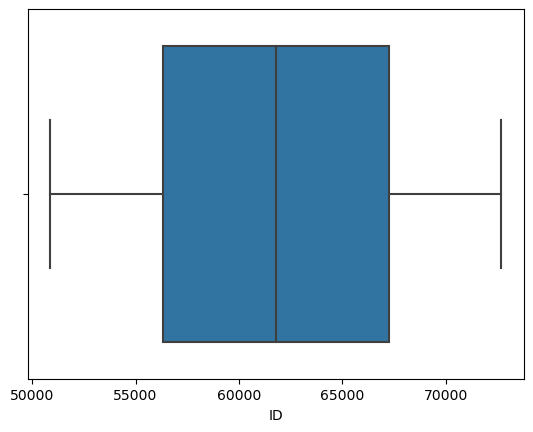

City_Code


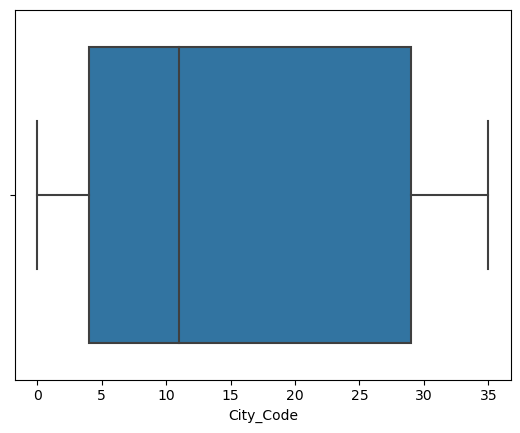

Region_Code


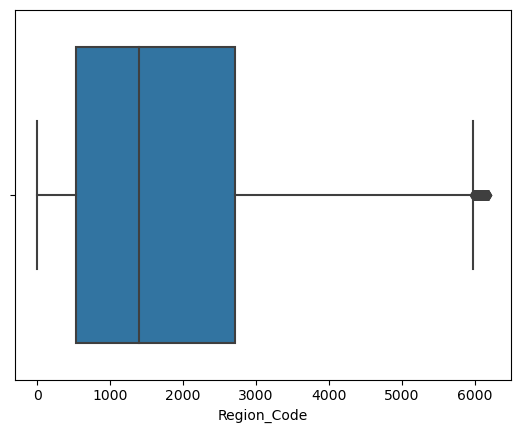

Accomodation_Type


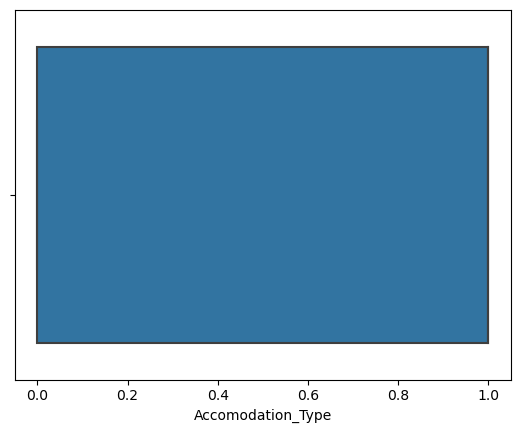

Reco_Insurance_Type


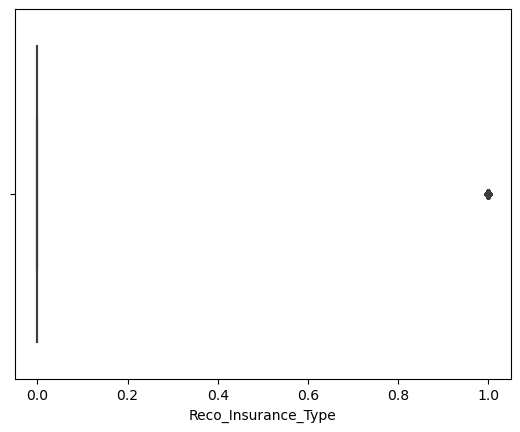

Upper_Age


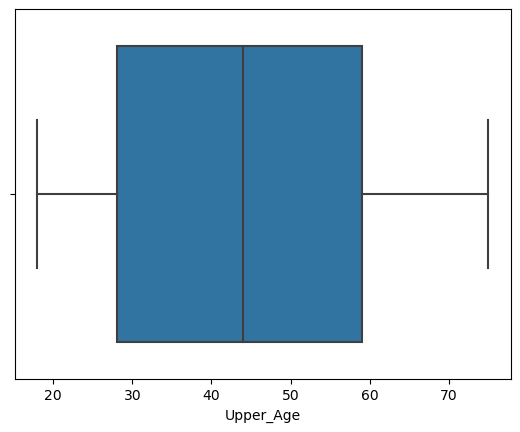

Lower_Age


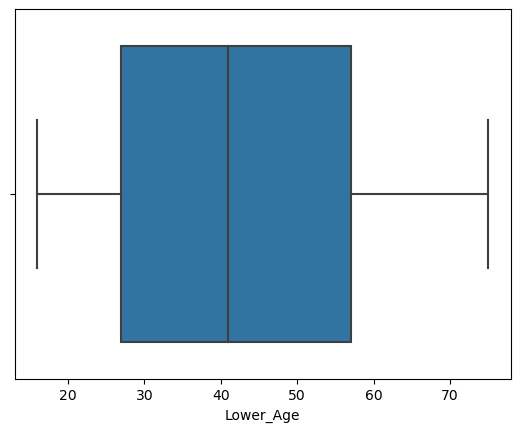

Is_Spouse


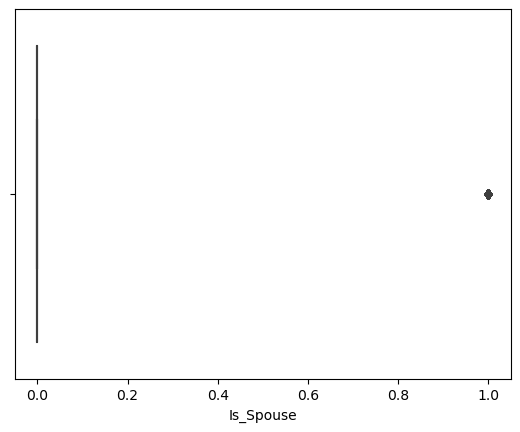

Health Indicator


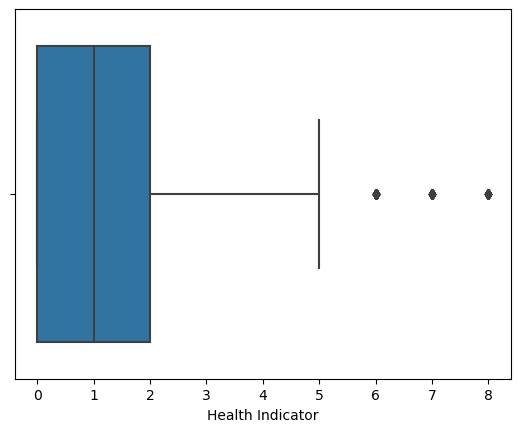

Holding_Policy_Duration


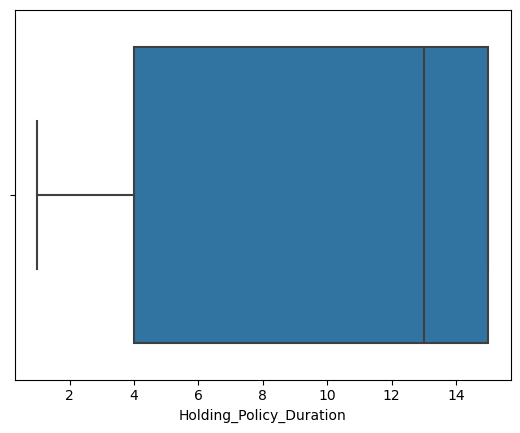

Holding_Policy_Type


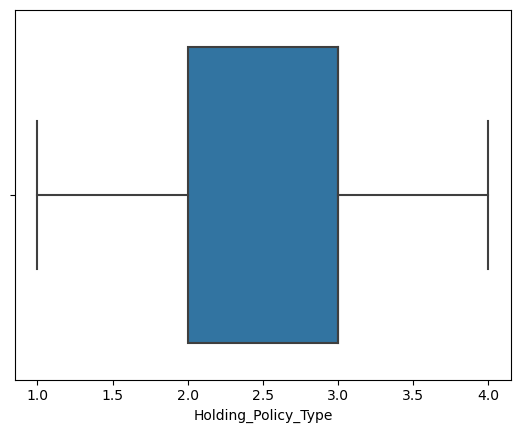

Reco_Policy_Cat


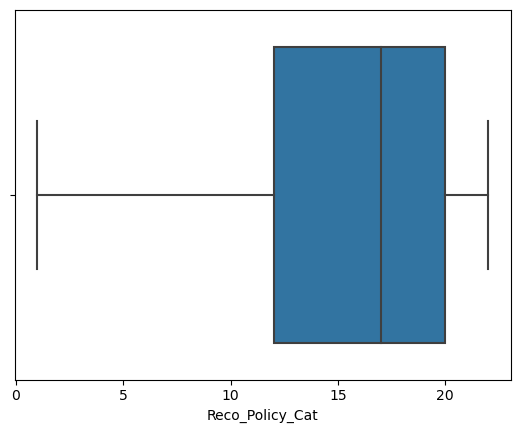

In [70]:
for col in df_test.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=df_test[col],data=df_test)
    plt.show()

In [71]:
df2=boxoutlier(df_test)

ID


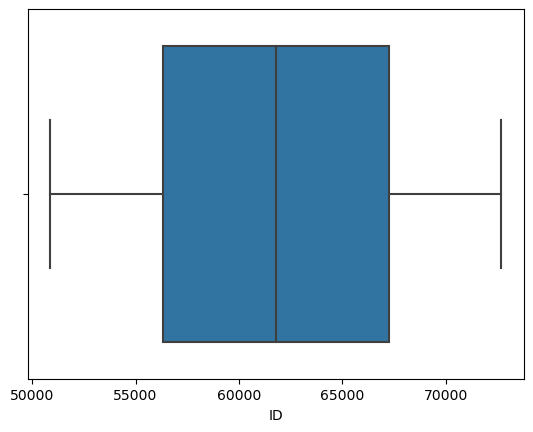

City_Code


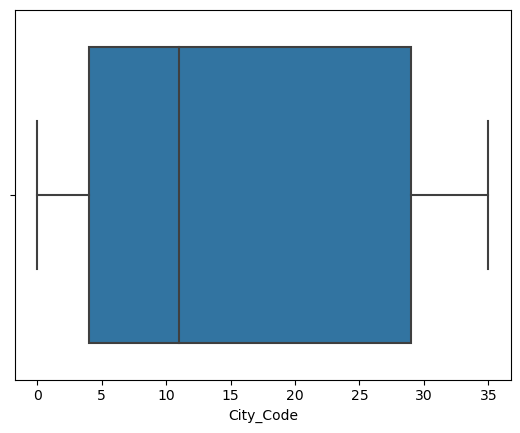

Region_Code


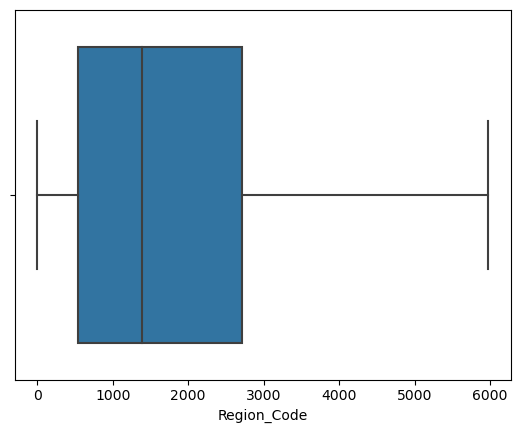

Accomodation_Type


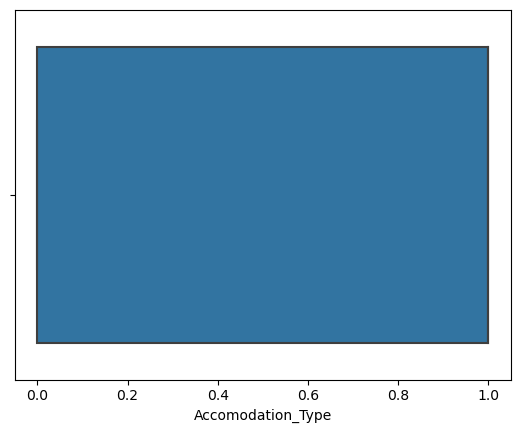

Reco_Insurance_Type


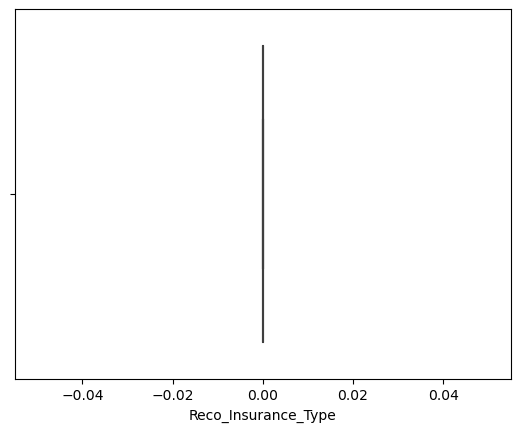

Upper_Age


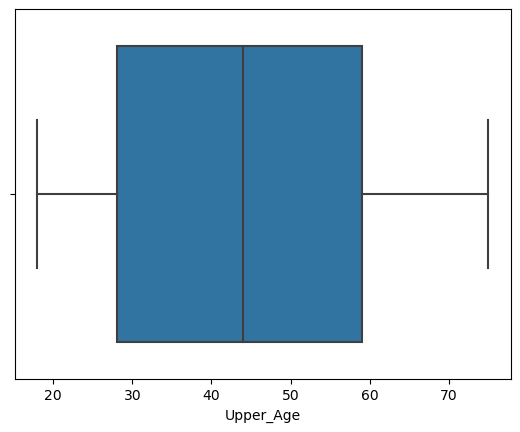

Lower_Age


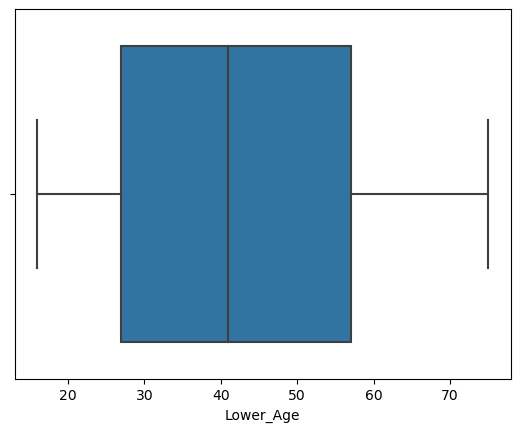

Is_Spouse


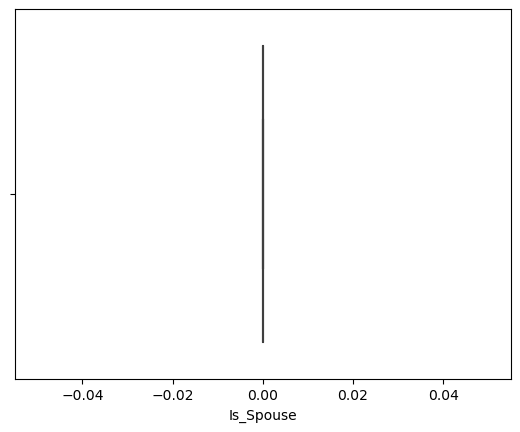

Health Indicator


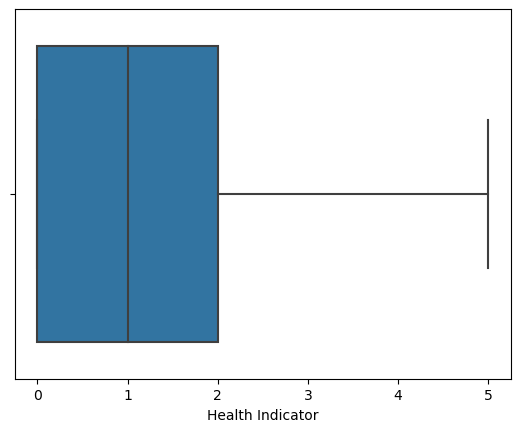

Holding_Policy_Duration


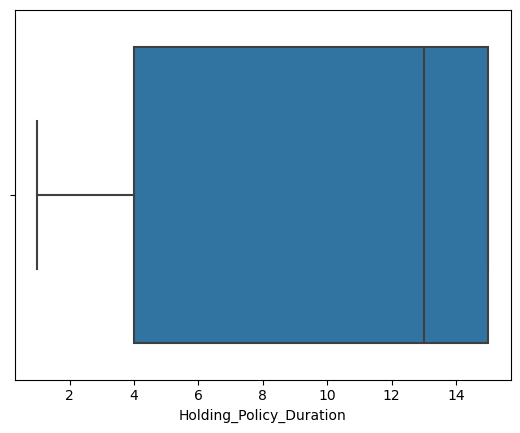

Holding_Policy_Type


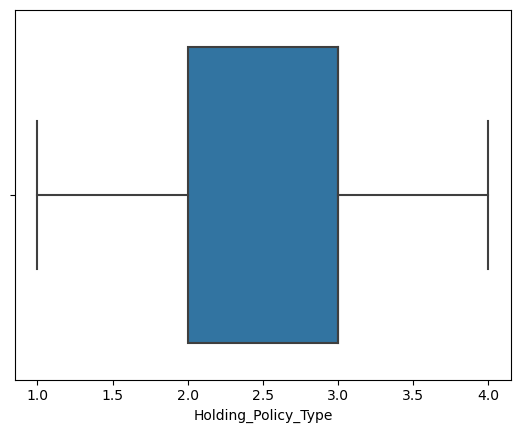

Reco_Policy_Cat


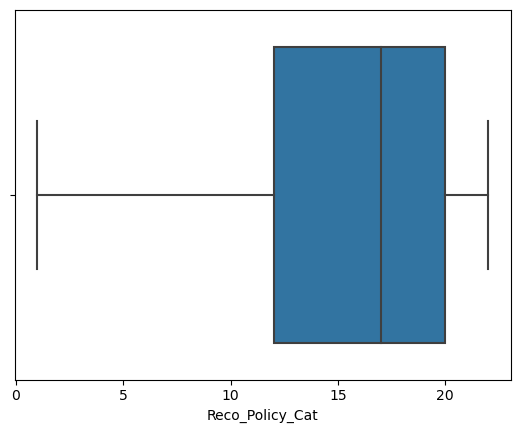

In [72]:
for col in df2.iloc[:,:-1].columns:
    print(col)
    sns.boxplot(x=df2[col],data=df2)
    plt.show()

In [73]:
# For Binary
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
predict_testdata = DT.predict(df2)
# testing data(unseen data)

In [74]:
predict_testdata

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
final_submission=df2.iloc[:,0:1].copy()
# final_submission[0]